# Exercise 4.2: Predicting Fuel Efficiency

Author: Jordan, Andrew

Date: 06/27/2022

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pwd

'C:\\Users\\Andrew\\Documents\\Grad School\\DSC 550 - Data Mining\\Assignments'

#### 1. Load the data as a Pandas data frame and ensure that it imported correctly.

In [44]:
mpgs = pd.read_csv("data/auto-mpg.csv")
mpgs.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


#### 2. Begin by prepping the data for modeling

In [45]:
#Remove the car name column
mpgs = mpgs.drop(['car name'], axis=1)
mpgs.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [46]:
# The horsepower column values likely imported as a string data type. 
# Figure out why and replace any strings with the column mean.
mpgs.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [47]:
mpgs['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

It appears that the question marks have caused the column to be imported as an object

In [48]:
# Convert data type to numeric
mpgs['horsepower'] = pd.to_numeric(mpgs['horsepower'], errors='coerce').astype('Float64')
mpgs.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      Float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [49]:
# Replace question marks with NaN
mpgs['horsepower'] = mpgs['horsepower'].replace('?', np.nan)
mpgs['horsepower'].unique()

<FloatingArray>
[130.0, 165.0, 150.0, 140.0, 198.0, 220.0, 215.0, 225.0, 190.0, 170.0, 160.0,
  95.0,  97.0,  85.0,  88.0,  46.0,  87.0,  90.0, 113.0, 200.0, 210.0, 193.0,
  <NA>, 100.0, 105.0, 175.0, 153.0, 180.0, 110.0,  72.0,  86.0,  70.0,  76.0,
  65.0,  69.0,  60.0,  80.0,  54.0, 208.0, 155.0, 112.0,  92.0, 145.0, 137.0,
 158.0, 167.0,  94.0, 107.0, 230.0,  49.0,  75.0,  91.0, 122.0,  67.0,  83.0,
  78.0,  52.0,  61.0,  93.0, 148.0, 129.0,  96.0,  71.0,  98.0, 115.0,  53.0,
  81.0,  79.0, 120.0, 152.0, 102.0, 108.0,  68.0,  58.0, 149.0,  89.0,  63.0,
  48.0,  66.0, 139.0, 103.0, 125.0, 133.0, 138.0, 135.0, 142.0,  77.0,  62.0,
 132.0,  84.0,  64.0,  74.0, 116.0,  82.0]
Length: 94, dtype: Float64

In [50]:
# Replace NaN with column mean
mpgs['horsepower'] = mpgs['horsepower'].fillna(mpgs['horsepower'].mean())
mpgs['horsepower'].unique()

<FloatingArray>
[             130.0,              165.0,              150.0,
              140.0,              198.0,              220.0,
              215.0,              225.0,              190.0,
              170.0,              160.0,               95.0,
               97.0,               85.0,               88.0,
               46.0,               87.0,               90.0,
              113.0,              200.0,              210.0,
              193.0, 104.46938775510205,              100.0,
              105.0,              175.0,              153.0,
              180.0,              110.0,               72.0,
               86.0,               70.0,               76.0,
               65.0,               69.0,               60.0,
               80.0,               54.0,              208.0,
              155.0,              112.0,               92.0,
              145.0,              137.0,              158.0,
              167.0,               94.0,              107.0,
        

Another option would be to assign the mean value to a variable, then just use .replace to replace all the question marks with the mean value variable. 

#### 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [52]:
mpgs.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


Both displacement and weight have a negative correlation with mpg of -.80 or greater, indicating there likely is a relationship between mpg and those respective variables. Cylinders and horsepower also have a high negative correlation of -.77 or higher, inidicating there is also likely a relationship between mpg and these two variables. Though origin and model year both have positive correlations with mpg of over .55, there is much less indication of a statistically significant relationship than between mpg and displacement/weight. 

#### 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

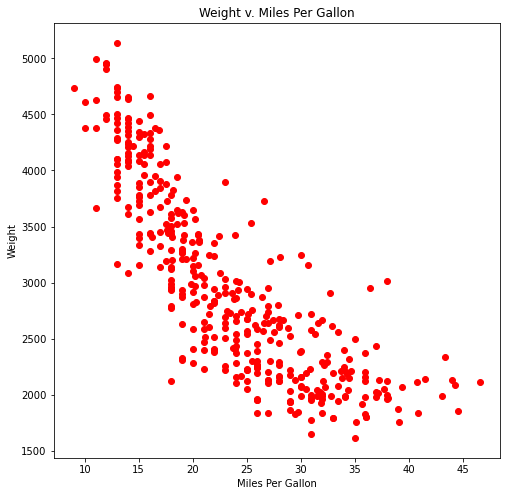

In [57]:
plt.figure(figsize=(8,8))
plt.scatter(mpgs['mpg'], mpgs['weight'], color='red')
plt.xlabel('Miles Per Gallon')
plt.ylabel('Weight')
plt.title('Weight v. Miles Per Gallon')
plt.show()

The negative correlation of -.83 between weight and mpg is illustrated well by the above plot. The downward slope shows the strong negative linear relationship, indicating that as a vehicle weight decreases the mpg improves. 

#### 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [63]:
mpgs_train, mpgs_test = train_test_split(mpgs, test_size=.2, random_state=42) 
#Random state chosen was calculated over 7.5 million years
mpgs_train_target = mpgs_train['mpg']
mpgs_test_target = mpgs_test['mpg']

#### 6. Train an ordinary linear regression on the training data.

In [64]:
ordinary_model = LinearRegression()
ordinary_model.fit(mpgs_train, mpgs_train_target)

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


LinearRegression()

#### 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [75]:
pred_train = ordinary_model.predict(mpgs_train)
actual_train = mpgs_train_target
pred_test = ordinary_model.predict(mpgs_test)
actual_test = mpgs_test_target

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [78]:
r2_train = metrics.r2_score(actual_train, pred_train)
mse_train = metrics.mean_squared_error(actual_train, pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = metrics.mean_absolute_error(actual_train, pred_train)
print("R-Squared:", r2_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:",mae_train)

R-Squared: 1.0
MSE: 5.7641421363885e-29
RMSE: 7.592194765934618e-15
MAE: 5.882087270089509e-15


In [79]:
r2_test = metrics.r2_score(actual_test, pred_test)
mse_test = metrics.mean_squared_error(actual_test, pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = metrics.mean_absolute_error(actual_test, pred_test)
print("R-Squared:", r2_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:",mae_test)

R-Squared: 1.0
MSE: 5.265646542350254e-29
RMSE: 7.256477480396569e-15
MAE: 5.88418203051333e-15


The R2 scores of 1.0 shows that the model is a perfect fit. Similar MAE scores of approximately 5.88, as well as approximate RMSE scores of 7.59 and 7.26, show a consistency in the residuals between the two sets.

#### 8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [88]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [90]:
scaler=StandardScaler()

In [94]:
train_standardized = scaler.fit_transform(mpgs_train)
test_standardized = scaler.fit_transform(mpgs_test)
print(train_standardized)
print(test_standardized)

[[-0.96085946  1.52718818  1.0901965  ... -1.31933367 -1.6966673
  -0.72949361]
 [ 0.42836365 -0.85051483 -0.92299623 ... -0.41318225 -1.6966673
   1.73836775]
 [ 1.69129374 -0.85051483 -0.98134964 ...  0.92792185  1.63897537
   1.73836775]
 ...
 [-0.31676511 -0.85051483 -0.56315019 ... -0.30444408  0.52709448
   1.73836775]
 [ 1.77969885 -0.85051483 -1.00080078 ...  0.60170734  1.36100515
   1.73836775]
 [ 0.30207064 -0.85051483 -0.92299623 ...  1.94281144 -0.86275663
   0.50443707]]
[[ 1.34434622e+00 -8.80696034e-01 -9.95118603e-01 -1.33345311e+00
  -1.35587159e+00  7.79425888e-01  8.99775405e-02  1.97814142e+00]
 [ 6.62456176e-01 -8.80696034e-01 -7.29080903e-01 -7.15518077e-01
  -4.02993015e-01  1.22113123e+00  1.57926097e+00 -6.59380473e-01]
 [-5.64945900e-01  2.55685945e-01  2.98375041e-01 -2.16416708e-01
  -3.92660596e-01 -8.40160373e-01 -1.15109198e+00 -6.59380473e-01]
 [-1.38321395e+00  1.39206792e+00  1.08731443e+00  9.71919886e-01
   1.10668810e+00 -7.66542815e-01  8.99775405

In [95]:
ridge_regression = Ridge(alpha=.5)

In [96]:
ridge_train = ridge_regression.fit(train_standardized, mpgs_train_target)
ridge_test = ridge_regression.fit(test_standardized, mpgs_test_target)